In [1]:
# program to predict the Income of People
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.columns = df.columns.str.replace(' ','_')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# check size of dataset
df.shape

(32560, 15)

In [3]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


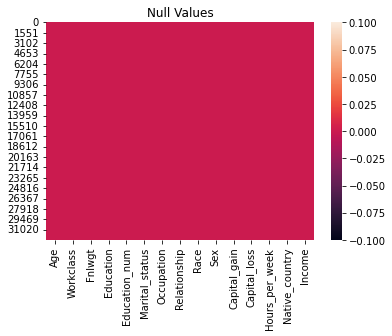

In [4]:
# check for any null values
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [5]:
# summing up total null values in dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
# getting all column names to observe type of variables
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [8]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [10]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [12]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [13]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [15]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [16]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [17]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
# summing up total null values in dataset again
df.isnull().sum().sum()

0

In [19]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

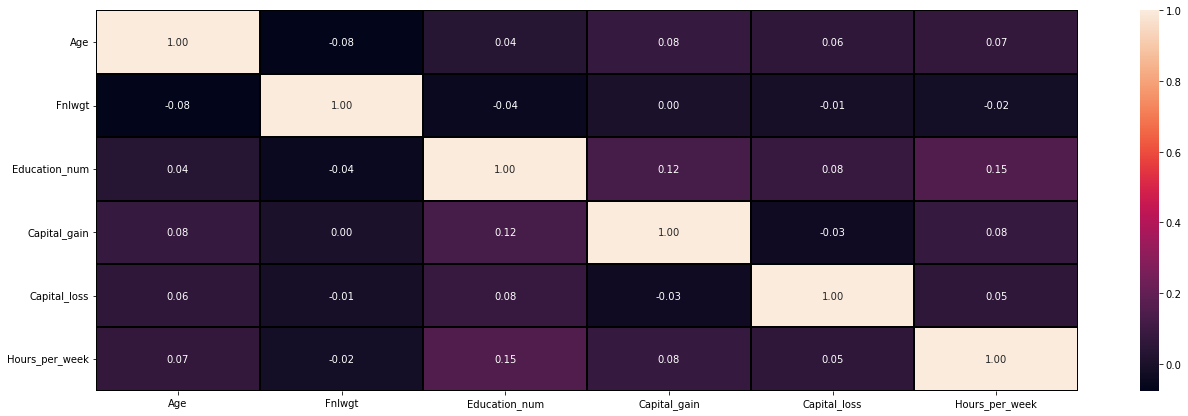

In [20]:
# checking corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [21]:
# encoding string type data to use them in plotting and making model on basis of observations
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Education'] = LE.fit_transform(df['Education'])

In [22]:
LE2 = LabelEncoder()
df['Marital_status'] = LE2.fit_transform(df['Marital_status'])

In [23]:
LE3 = LabelEncoder()
df['Occupation'] = LE3.fit_transform(df['Occupation'])

In [24]:
LE4 = LabelEncoder()
df['Race'] = LE4.fit_transform(df['Race'])

In [25]:
LE5 = LabelEncoder()
df['Relationship'] = LE5.fit_transform(df['Relationship'])

In [26]:
LE6 = LabelEncoder()
df['Sex'] = LE6.fit_transform(df['Sex'])

In [27]:
LE7 = LabelEncoder()
df['Native_country'] = LE7.fit_transform(df['Native_country'])

In [28]:
LE8 = LabelEncoder()
df['Income'] = LE8.fit_transform(df['Income'])

In [29]:
LE9 = LabelEncoder()
df['Workclass'] = LE9.fit_transform(df['Workclass'])

In [30]:
LE.inverse_transform([0,1,2,3,4,5])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th'],
      dtype=object)

In [31]:
LE2.inverse_transform(df['Marital_status'])

array([' Married-civ-spouse', ' Divorced', ' Married-civ-spouse', ...,
       ' Widowed', ' Never-married', ' Married-civ-spouse'], dtype=object)

C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

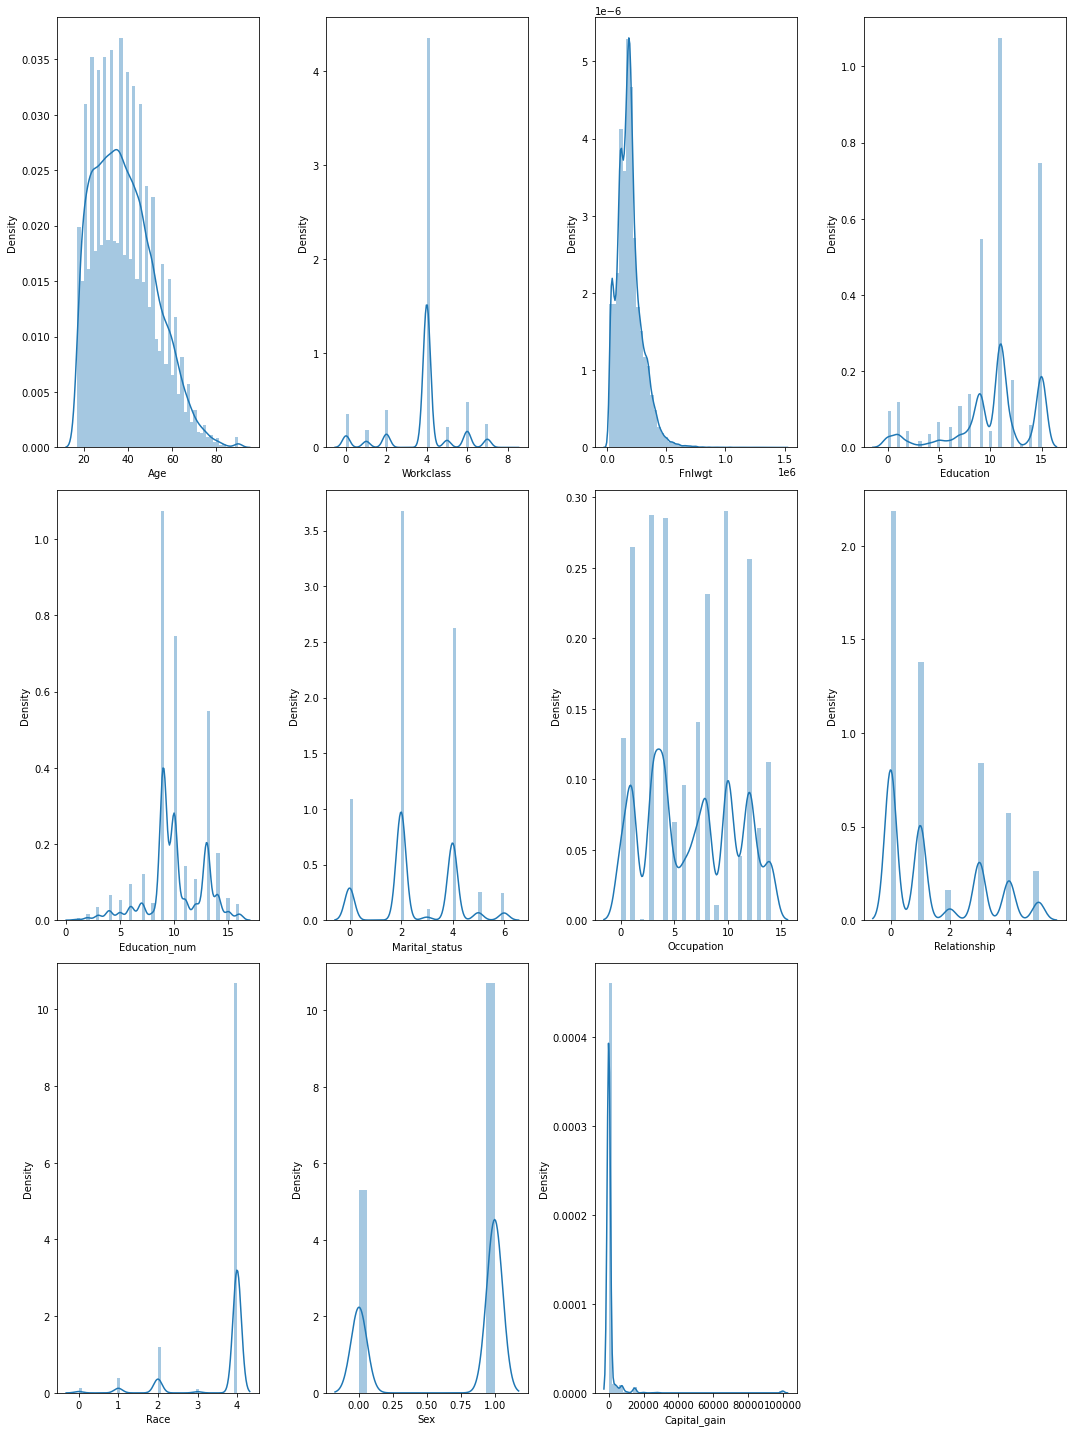

In [32]:
# plotting density of values in each column
import warnings
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [33]:
# Preprocessing
# spliting dependent and independent variables on x and y axis
x = df.drop('Income',axis=1)
y = df['Income']

In [34]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [35]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [36]:
x.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
dtype: object

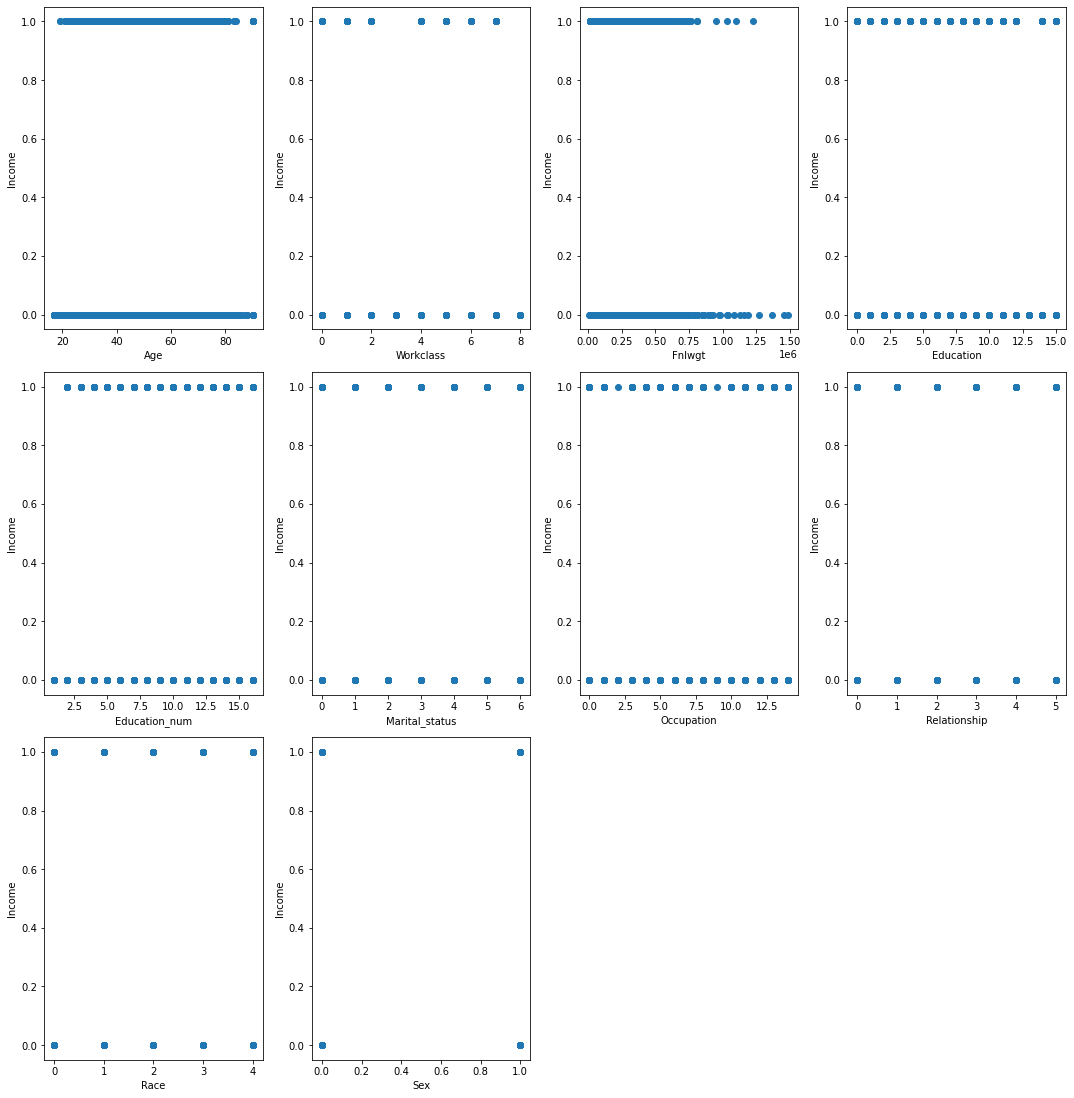

In [37]:
# making scatter plot of Income vs other independent variables in dataset for observations
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Income',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [38]:
# use Random Forest to make model for Income prediction
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=60)
y_train.head()

25806    0
24041    0
6010     1
2320     1
21471    0
Name: Income, dtype: int32

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 101, n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=101, n_jobs=-1)

In [40]:
y_pred = rf.predict(x_test)

In [41]:
# find accuracy of predictions made by comparing to test sample
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8533988533988534

In [42]:
# save model in pickle file
import pickle
filename= 'Census_Income_model.pickle'
pickle.dump(RandomForestClassifier,open(filename,'wb'))